In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 500
cov_nercome_100000 = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}_avg100000.matrix")
cov_nercome_10000 = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}_avg10000.matrix")
cov_nercome_1000 = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [3]:
evals_nercome_100000 = np.linalg.eigvalsh(cov_nercome_100000)
evals_nercome_10000 = np.linalg.eigvalsh(cov_nercome_10000)
evals_nercome_1000 = np.linalg.eigvalsh(cov_nercome_1000)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

Text(0, 0.5, 'Eigenvalues')

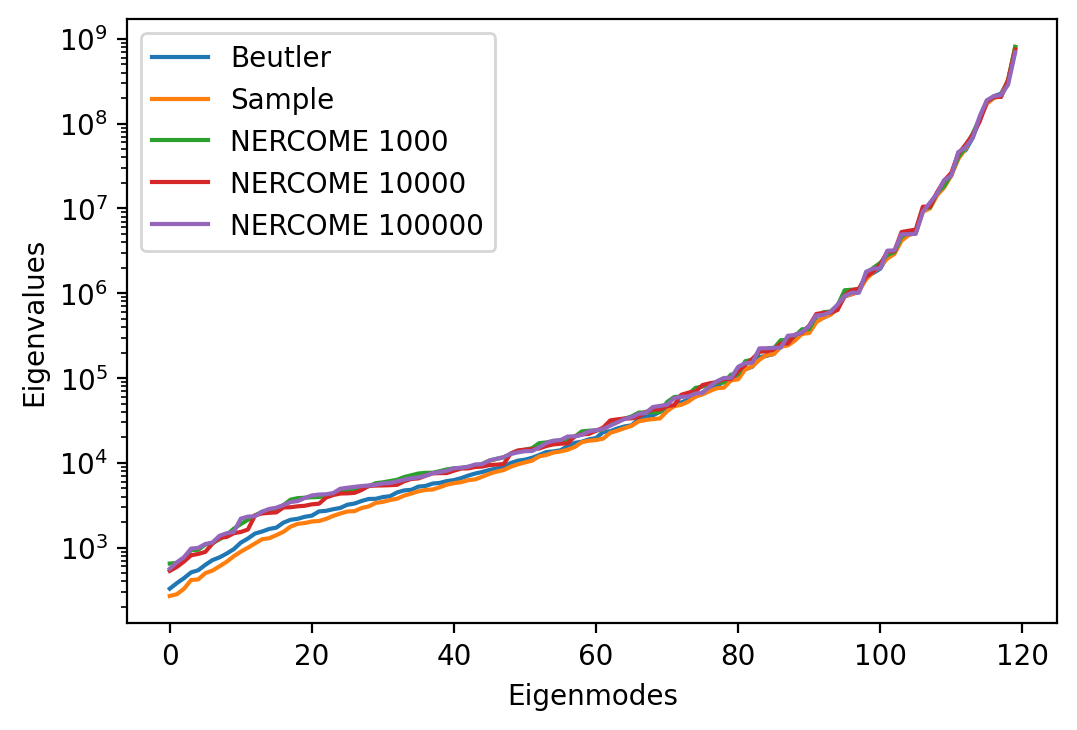

In [4]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome_1000, label="NERCOME 1000")
plt.plot(evals_nercome_10000, label="NERCOME 10000")
plt.plot(evals_nercome_100000, label="NERCOME 100000")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

#parameters = AnchoredText(
#    fr"$n = {n}$" "\n"
#    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
#    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
#    frameon=False, loc="lower right", pad=0.5)
#plt.setp(parameters.patch, facecolor='white', alpha=0.5)
#plt.gca().add_artist(parameters)